# Pair Programming EDA II

Objetivos

En el ejercicio de hoy tendremos que contestar a las siguientes preguntas:

📌 Nota Como siempre, después de cada gráfica incluid una pequeña explicación de lo que nos está mostrando la gráfica.

Estableced el tamaño de las figuras al inicio de vuestro jupyter para que todas tengan las mismas dimensiones.

Manos a la obra con los plots, estos irán muy dirigidos hacia las preguntas que queremos contestar, para hacer una primera aproximación a nuestras hipótesis.

In [5]:
import pandas as pd
import sidetable
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('../datos/datos_limpiezaI.csv', index_col= 0)
pd.options.display.max_columns=None

In [9]:
plt.rcParams['figure.figsize'] = (10,8)

1. ¿Cuántos ataques hubo por pais? ¿Se puede ver algo claro si ploteamos todos los paises? En caso de que no, seleccionad solo los 10 paises con más ataques y volved a hacer el plot.

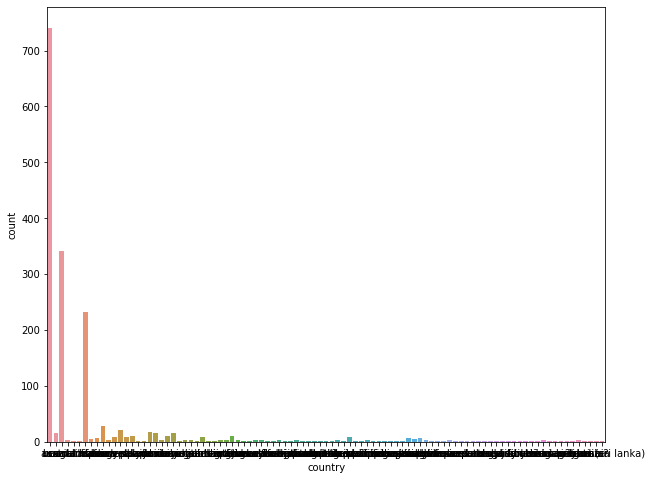

In [10]:
fig = sns.countplot(x= 'country', data = df)
plt.show();

No se puede ver nada claro

In [11]:
paises = df.stb.freq(['country'])[:10]

In [12]:
paises

,country,count,percent,cumulative_count,cumulative_percent
0,usa,741,44.746377,741,44.746377
1,australia,341,20.591787,1082,65.338164
2,south africa,233,14.070048,1315,79.408213
3,bahamas,29,1.751208,1344,81.159420
4,new zealand,21,1.268116,1365,82.427536
5,reunion,17,1.026570,1382,83.454106
6,brazil,16,0.966184,1398,84.420290
7,papua new guinea,15,0.905797,1413,85.326087
8,mexico,15,0.905797,1428,86.231884
9,italy,11,0.664251,1439,86.896135


In [13]:
paises['country'].unique()

array(['usa', 'australia', 'south africa', 'bahamas', 'new zealand',
       'reunion', 'brazil', 'papua new guinea', 'mexico', 'italy'],
      dtype=object)

<AxesSubplot:ylabel='country'>

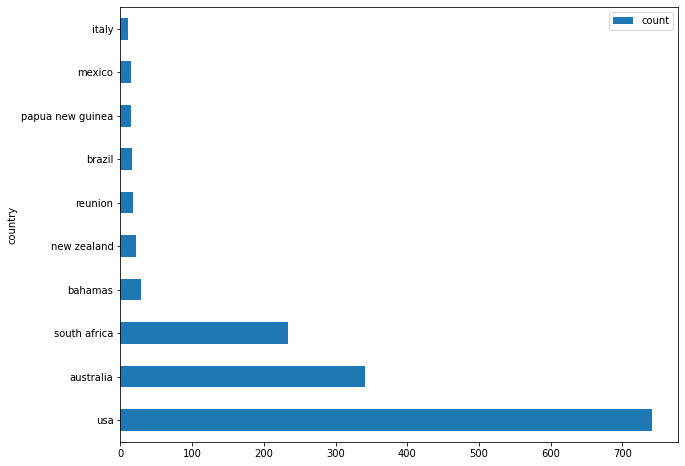

In [16]:
paises.plot.barh(x='country', y = 'count')


2. Usando el DataFrame de los 10 paises con más ataques, ¿hay diferencias entre sexos en esos paises?

In [19]:
paises1 = paises['country'].unique()

In [20]:
df10 = df[df['country'].isin(paises1)]

In [28]:
df10.stb.freq(['country'])

,country,count,percent,cumulative_count,cumulative_percent
0,usa,741,51.494093,741,51.494093
1,australia,341,23.697012,1082,75.191105
2,south africa,233,16.191800,1315,91.382905
3,bahamas,29,2.015288,1344,93.398193
4,new zealand,21,1.459347,1365,94.857540
5,reunion,17,1.181376,1382,96.038916
6,brazil,16,1.111883,1398,97.150799
7,papua new guinea,15,1.042391,1413,98.193190
8,mexico,15,1.042391,1428,99.235580
9,italy,11,0.764420,1439,100.000000


In [31]:
df10.stb.missing()

,missing,total,percent
fatal,80,1439,5.559416
age,56,1439,3.891591
species_,42,1439,2.918694
mes,17,1439,1.181376
sexo,2,1439,0.138985
year,0,1439,0.000000
country,0,1439,0.000000
date,0,1439,0.000000


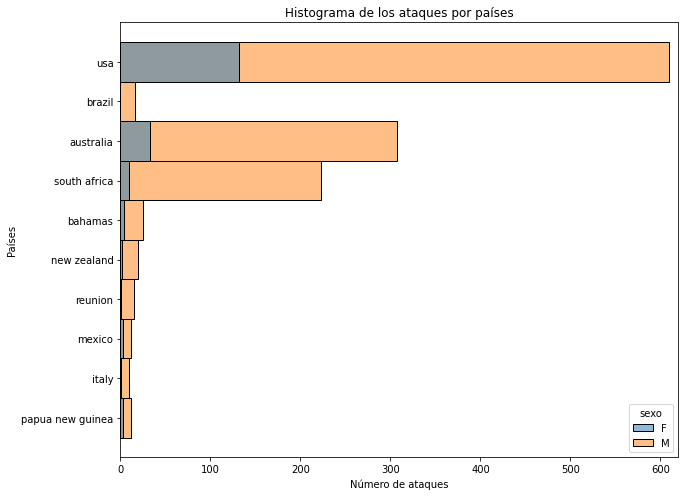

In [48]:
# seleccionamos el histplot 

fig = sns.histplot(y='country', data = df10, hue = 'sexo')

# cambiamos el nombre de los ejes
fig.set(xlabel='Número de ataques', ylabel = 'Países')

# ponemos título a la gráfica
fig.set_title('Histograma de los ataques por países')

# mostramos la gráfica
plt.xlim(0,620)
plt.show()


3. ¿Qué edad recibe mayor número de ataques? 💡 Pista 💡 Para que esta gráfica nos salga legible tendremos que crear antes grupos de edad. Para hacer esto de una forma sencilla tenemos el método pd.cut() que aprendimos en la lección de Limpieza II.

In [38]:
df10['age'].unique()

array(['57', '18', '15', '32', '60', '33', '19', '25', '10', '69', '55',
       '35', '20', '54', '31', '40', '37', '13', '34', '50', '46', '48',
       '17', '28', '65', '73', '58', '36', '60s', '51', '21', '61', '59',
       '42', '6', '27', '29', '22', '23', '39', '12', '11', '71', '43',
       '9', '44', '14', '62', '52', '38', '68', '16', '47', '63', '26',
       '70', '41', '40s', '53', '20s', '7', '66', '30', '24', '45', '74',
       '64', '8', '56', '49', 'Teen', '30s', '77', '8 or 10', '84',
       '\xa0 ', '30 or 36', '6½', '5', ' 30', ' 28', "60's", '67', '>50',
       '? & 19', '30 & 32', nan, 'young'], dtype=object)

In [ ]:
#Hay que limpiar

In [ ]:
df10['rango_edad'] = pd.cut(df2['age'], )

4. Ataques entre sexos, ¿hay diferencia?

5. ¿Cuando ocurren más ataques? ¿Os sale algo raro en la gráfica? Intentad limpiar un poco los datos para que os salga mejor.